# **Project Name**    - Facial Emotion Recognition Using Deep Learning



##### **Project Type**    - Deep Learning for Computer Vision
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Deep_Learning_for_Computer_Vision.git

# Project Title:
**DeepFER: Facial Emotion Recognition Using Deep Learning**

## Overview

DeepFER: Facial Emotion Recognition Using Deep Learning aims to develop a robust and efficient system for recognizing emotions from facial expressions using advanced deep learning techniques. This project leverages Convolutional Neural Networks (CNNs) and Transfer Learning to accurately classify emotions such as happiness, sadness, anger, surprise, and more from images of human faces. The system will be trained on a diverse dataset of facial images, employing data augmentation and fine-tuning methods to enhance its performance. By integrating state-of-the-art computer vision algorithms and neural network architectures, DeepFER seeks to achieve high accuracy and real-time processing capabilities. The ultimate goal is to create a versatile tool that can be applied in various fields, including human-computer interaction, mental health monitoring, and customer service, enhancing the way machines understand and respond to human emotions.

## Project Background

Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

In recent years, the field of facial emotion recognition has gained significant attention due to its wide range of applications in various domains, including mental health monitoring, human-computer interaction, customer service, and security. Emotion recognition from facial expressions is a challenging task, as it involves accurately identifying subtle differences in facial features corresponding to different emotional states. Traditional methods relied heavily on handcrafted features and rule-based approaches, which often lacked the ability to generalize across diverse datasets and real-world scenarios.

The advent of deep learning, particularly Convolutional Neural Networks (CNNs), has revolutionized the way facial emotion recognition systems are developed. CNNs have demonstrated exceptional performance in image classification tasks by automatically learning hierarchical feature representations from raw data.

This project, DeepFER: Facial Emotion Recognition Using Deep Learning, aims to harness the power of CNNs and Transfer Learning to build a robust and efficient facial emotion recognition system. By training the model on large, annotated datasets and employing advanced techniques such as data augmentation and fine-tuning, DeepFER aspires to achieve high accuracy and real-time processing capabilities.

The motivation behind this project stems from the growing need for automated systems that can understand and respond to human emotions effectively. Such systems can significantly enhance user experiences in various applications, from interactive virtual assistants to personalized mental health interventions. DeepFER seeks to bridge the gap between advanced AI techniques and practical emotion recognition applications, paving the way for more intuitive and empathetic machine interactions with humans.

## Dataset Overview

- **Dataset Composition:**
  - Contains images categorized into seven distinct emotion classes: angry, sad, happy, fear, neutral, disgust, and surprise.
- **Emotion Classes:**
  - **Angry:** Images depicting expressions of anger.
  - **Sad:** Images depicting expressions of sadness.
  - **Happy:** Images depicting expressions of happiness.
  - **Fear:** Images depicting expressions of fear.
  - **Neutral:** Images depicting neutral, non-expressive faces.
  - **Disgust:** Images depicting expressions of disgust.
  - **Surprise:** Images depicting expressions of surprise.

- **Image Characteristics:**
  - High-quality facial images with diverse backgrounds and lighting conditions.
  - Includes both posed and spontaneous expressions to ensure robustness.
- **Data Augmentation:**
  - Techniques such as rotation, scaling, and flipping applied to increase dataset variability and enhance model generalization.
- **Dataset Annotations:**
  - Each image is labeled with its corresponding emotion class.
- **Data Source:**
  - Collected from publicly available facial expression databases and crowd-sourced contributions.
- **Usage:**
  - Used for training, validation, and testing phases in the emotion recognition model development.
- **Purpose:**
  - To train and evaluate the DeepFER model for accurate and real-time facial emotion recognition across diverse scenarios.


---


## Project Goal

The primary goal of **DeepFER: Facial Emotion Recognition Using Deep Learning** is to develop an advanced and efficient system capable of accurately identifying and classifying human emotions from facial expressions in real-time. By leveraging state-of-the-art Convolutional Neural Networks (CNNs) and Transfer Learning techniques, this project aims to create a robust model that can handle the inherent variability in facial expressions and diverse image conditions. The system will be trained on a comprehensive dataset featuring seven distinct emotions: angry, sad, happy, fear, neutral, disgust, and surprise. The ultimate objective is to achieve high accuracy and reliability, making DeepFER suitable for applications in human-computer interaction, mental health monitoring, customer service, and beyond. Through this project, we aim to bridge the gap between cutting-edge AI research and practical emotion recognition applications, contributing to more empathetic and responsive machine interactions with humans.

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
from pathlib import Path
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [2]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M5/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M5/project/Face_Emotion_Recognition_Dataset.zip" > /dev/null

### Data First View

In [3]:
train_dir = "/content/images/images/train"
val_dir = "/content/images/images/validation"

all_class_names = os.listdir(train_dir)
print(all_class_names)

['angry', 'surprise', 'happy', 'disgust', 'fear', 'neutral', 'sad']


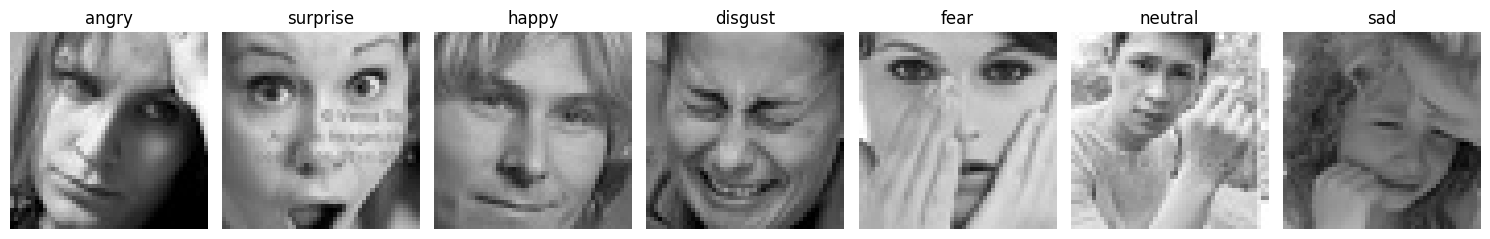

In [4]:
# display one image from each class
from fastai.vision.core import PILImage

# Convert train_dir to a Path object
train_dir_ = Path(train_dir)
fig, axes = plt.subplots(1, len(all_class_names), figsize=(15, 5))

for ax, cls in zip(axes, all_class_names):
    class_path = train_dir_ / cls
    img_path = list(class_path.glob("*"))[0]

    img = PILImage.create(img_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Function to count images in each class and calculate percentages
def count_images_with_percentage(directory):
    class_counts = {}
    total_images = 0

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[class_name] = count
            total_images += count

    class_percentages = {class_name: (count / total_images) * 100 for class_name, count in class_counts.items()}
    return class_counts, class_percentages, total_images


train_class_counts, train_class_percentages, train_total = count_images_with_percentage(train_dir)
val_class_counts, val_class_percentages, val_total = count_images_with_percentage(val_dir)

print("Training Set:")
print(f"Total images: {train_total}")
for class_name in sorted(train_class_counts):
    print(f"{class_name}: {train_class_counts[class_name]} images ({train_class_percentages[class_name]:.2f}%)")

print("\nValidation Set:")
print(f"Total images: {val_total}")
for class_name in sorted(val_class_counts):
    print(f"{class_name}: {val_class_counts[class_name]} images ({val_class_percentages[class_name]:.2f}%)")


Training Set:
Total images: 28821
angry: 3993 images (13.85%)
disgust: 436 images (1.51%)
fear: 4103 images (14.24%)
happy: 7164 images (24.86%)
neutral: 4982 images (17.29%)
sad: 4938 images (17.13%)
surprise: 3205 images (11.12%)

Validation Set:
Total images: 7066
angry: 960 images (13.59%)
disgust: 111 images (1.57%)
fear: 1018 images (14.41%)
happy: 1825 images (25.83%)
neutral: 1216 images (17.21%)
sad: 1139 images (16.12%)
surprise: 797 images (11.28%)


In [6]:
from PIL import Image

image_dir = "/content/images/images/train"

# Function to get image sizes
def get_image_sizes(directory):
    image_sizes = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    with Image.open(image_path) as img:
                        image_sizes.append(img.size)  # (width, height)
                except Exception as e:
                    print(f"Error reading {image_path}: {e}")
    return image_sizes


sizes = get_image_sizes(image_dir)


print(f"Total images checked: {len(sizes)}")
print(f"First 5 image sizes: {sizes[:5]}")


Total images checked: 28821
First 5 image sizes: [(48, 48), (48, 48), (48, 48), (48, 48), (48, 48)]


In [7]:
# Count unique image sizes
size_counts = Counter(sizes)
print("All image size distribution:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")


All image size distribution:
Size (48, 48): 28821 images


#### Summary of Data:
- **Classes**: The dataset contains 7 classes: `['angry', 'surprise', 'happy', 'disgust', 'fear', 'neutral', 'sad']`.
- **Total Train Images**: 28,821 images.
- **Image Size**: All images are uniformly sized at **48x48 pixels**.
- **Image Mode**: Grayscale (`L`), meaning each image has a single channel (shape: `48x48x1`).
- **Class Distribution**:
  - The `happy` class has the highest representation, comprising approximately 25% of the dataset.
  - The `disgust` class has the lowest representation, contributing around 1.5% of the dataset.

This dataset is well-suited for tasks such as facial emotion recognition and is already preprocessed to a consistent size and format.

## ***Model Implementation***

### Model - 1

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Data paths and details
train_images_path = "/content/images/images/train"
val_images_path = "/content/images/images/validation"

In [9]:
# Define labels
all_class_names = ['angry', 'surprise', 'happy', 'disgust', 'fear', 'neutral', 'sad']
class_to_label = {class_name: idx for idx, class_name in enumerate(all_class_names)}

In [10]:
# Image processing function
def process_image(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Load and preprocess images
def load_data(image_dir, class_to_label):
    data = []
    labels = []
    for class_name, label in class_to_label.items():
        class_dir = os.path.join(image_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                processed_img = process_image(img_path)
                data.append(processed_img)
                labels.append(label)
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    return np.array(data), np.array(labels)


In [11]:
# Load training and validation data
train_images, train_labels = load_data(train_images_path, class_to_label)
val_images, val_labels = load_data(val_images_path, class_to_label)

# Reshape data to include the channel dimension
train_images = train_images.reshape(-1, 48, 48, 1)
val_images = val_images.reshape(-1, 48, 48, 1)

In [12]:
# Model Building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,659,271 (6.33 MB)

 Trainable params: 1,659,271 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=11, batch_size=32, callbacks=[early_stopping])


Epoch 1/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 97s 106ms/step - accuracy: 0.2589 - loss: 1.8022 - val_accuracy: 0.3909 - val_loss: 1.6159
Epoch 2/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 144s 109ms/step - accuracy: 0.3776 - loss: 1.6125 - val_accuracy: 0.4190 - val_loss: 1.5318
Epoch 3/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 99s 110ms/step - accuracy: 0.4142 - loss: 1.5291 - val_accuracy: 0.4416 - val_loss: 1.4755
Epoch 4/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 140s 108ms/step - accuracy: 0.4267 - loss: 1.4871 - val_accuracy: 0.4558 - val_loss: 1.4331
Epoch 5/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 100s 110ms/step - accuracy: 0.4543 - loss: 1.4371 - val_accuracy: 0.4649 - val_loss: 1.4035
Epoch 6/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 139s 108ms/step - accuracy: 0.4737 - loss: 1.3997 - val_accuracy: 0.4734 - val_loss: 1.3796
Epoch 7/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.4796 - loss: 1.3708 - val_accuracy: 0.4836 - val_loss: 1.3723
Epoch 8/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 97s 107ms/step - accuracy: 0.4893 - lo

In [16]:
# Save the model
model.save(folder_path+'deep_fer_model_1.keras')

In [17]:
# Save the model
model.save(folder_path+'deep_fer_model_1.h5')